<a href="https://colab.research.google.com/github/Richardesl10/Se-alesysistemasrichard/blob/main/ejercicio_en_clase%2C_dbode%2Crespuesta_impulso%2C_respuesta_escalon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

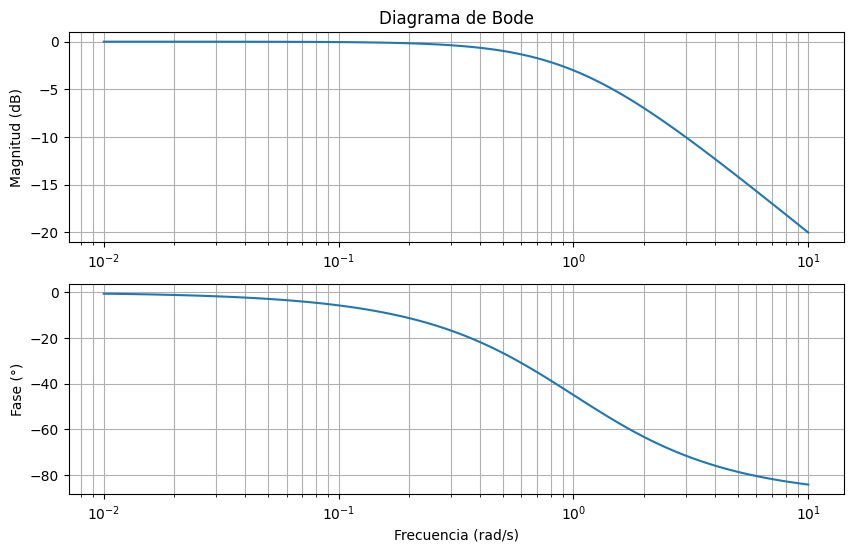

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
num = [1]
den = [1, 1]
system = signal.TransferFunction(num, den)

w, mag, phase = signal.bode(system)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title("Diagrama de Bode")
plt.ylabel("Magnitud (dB)")
plt.grid(True, which="both")

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel("Fase (°)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both")

plt.show()

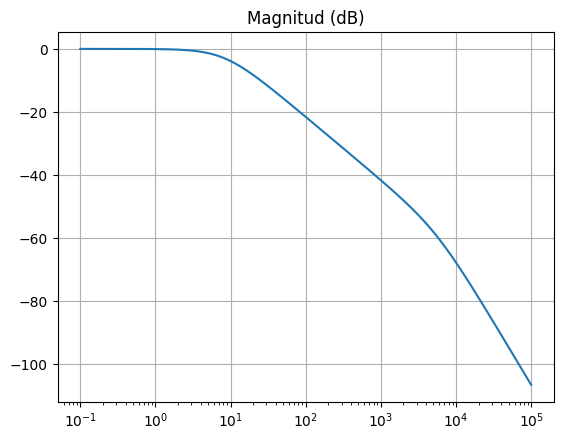

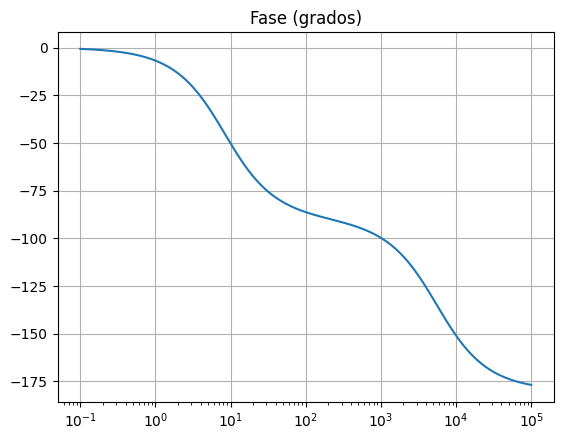

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def H(w, R, L, C):
  return 1/(-(L*C*(w**2))+(1j*R*C*w)+1) #crwamos nuestra función de transferencia
w = np.logspace(-1,5,2000) #genera valores igualmente espaciados en escala logaritmica, no lineal para que la frecuencia este en escala logaritmica como queremos
Heval = H(w, 1000, 180*10**(-3), 120*10**(-6)) #H evaluado, vector de frecuencias, resistencia, inductancia, capacitancia
Hmag = 20*np.log10(np.abs(Heval)) #magnitud de H en dB
Hphase = np.angle(Heval, deg=True) #fase de H
plt.figure()
plt.semilogx(w, Hmag) #hace gráfico con eje x logaritmico
plt.grid(True)
plt.title("Magnitud (dB)")

plt.figure()
plt.semilogx(w, Hphase)
plt.grid(True)
plt.title("Fase (grados)")
plt.show()

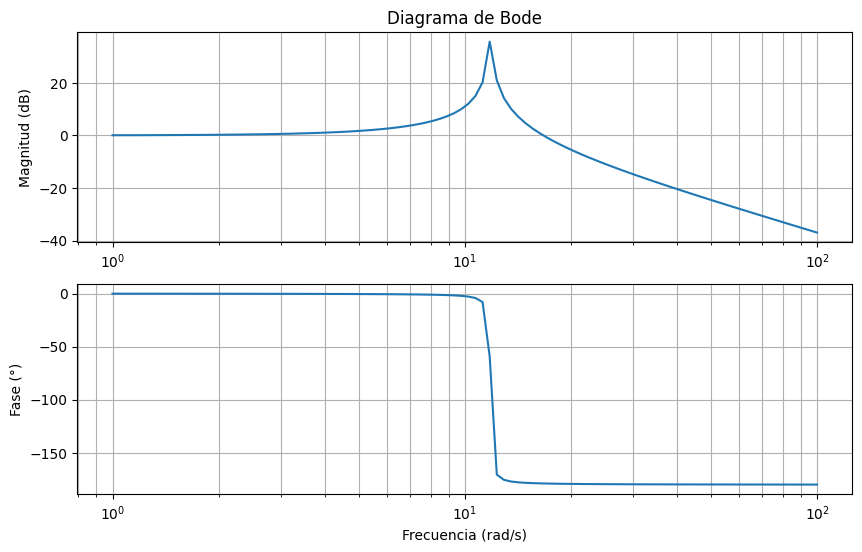

Polos del sistema:
[-0.08379888+11.81768938j -0.08379888-11.81768938j]

Ceros del sistema:
[]


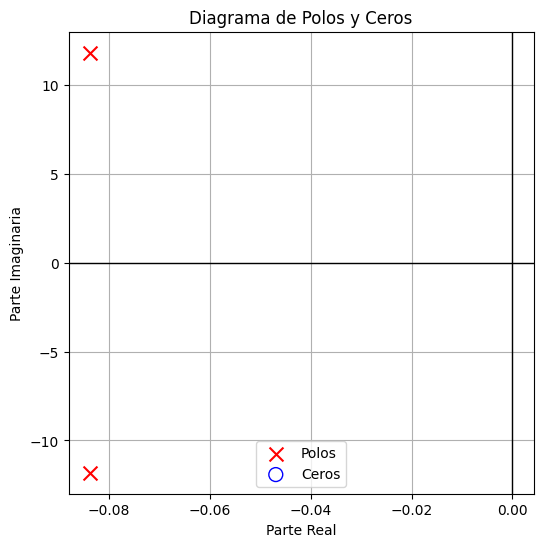

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, bode
from numpy import roots

# ===========================
#   FUNCIÓN DE TRANSFERENCIA
# ===========================

num = [1]
den = [7.16e-3, 1.2e-3, 1]

system = TransferFunction(num, den)

# ===========================
#   CÁLCULO DE BODE
# ===========================

w, mag, phase = bode(system)

plt.figure(figsize=(10,6))

# Magnitud
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title("Diagrama de Bode")
plt.ylabel("Magnitud (dB)")
plt.grid(True, which="both")

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.ylabel("Fase (°)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both")

plt.show()

# ===========================
#   CÁLCULO DE POLOS Y CEROS
# ===========================

polos = roots(den)
ceros = roots(num)

print("Polos del sistema:")
print(polos)

print("\nCeros del sistema:")
print(ceros)

# ===========================
#   DIAGRAMA DE POLOS Y CEROS
# ===========================

plt.figure(figsize=(6,6))

# Polos (X)
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='red', label='Polos', s=100)

# Ceros (O)
plt.scatter(np.real(ceros), np.imag(ceros), marker='o', facecolors='none', edgecolors='blue', label='Ceros', s=100)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title("Diagrama de Polos y Ceros")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid(True)
plt.legend()
plt.show()

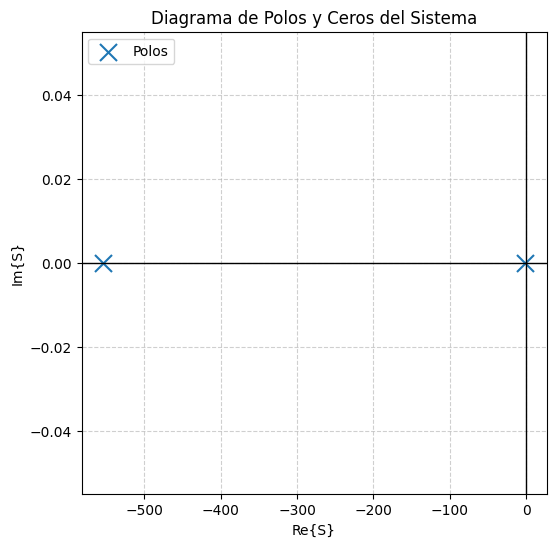

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Polos del sistema (los que calculaste)
p1 = -554.7
p2 = -0.8346

# No hay ceros
zeros = np.array([])

# Polos como vector
poles = np.array([p1, p2])

# --------- GRAFICA POLOS Y CEROS ----------
plt.figure(figsize=(6, 6))

# Graficar ceros (si hubiera)
if zeros.size > 0:
    plt.scatter(zeros.real, zeros.imag, marker='o', s=120, label='Ceros')

# Graficar polos
plt.scatter(poles.real, poles.imag, marker='x', s=150, label='Polos')

# Ejes imaginario y real
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.xlabel('Re{S}')
plt.ylabel('Im{S}')
plt.title('Diagrama de Polos y Ceros del Sistema')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

H(s) =
            1             
──────────────────────────
         2                
2.16e-5⋅s  + 1.44e-5⋅s + 1


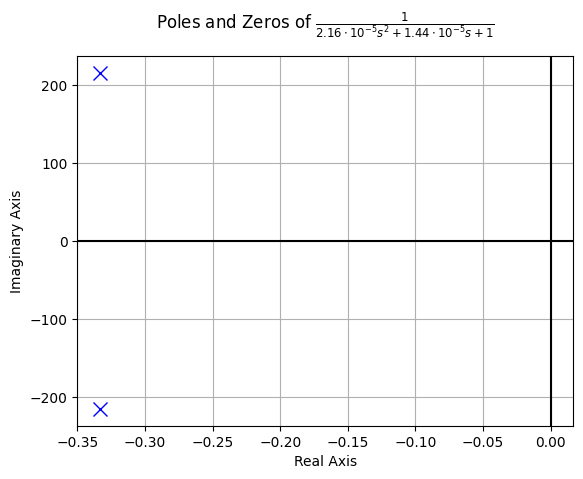

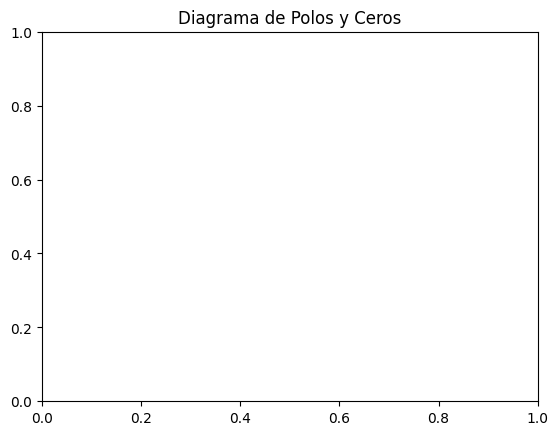

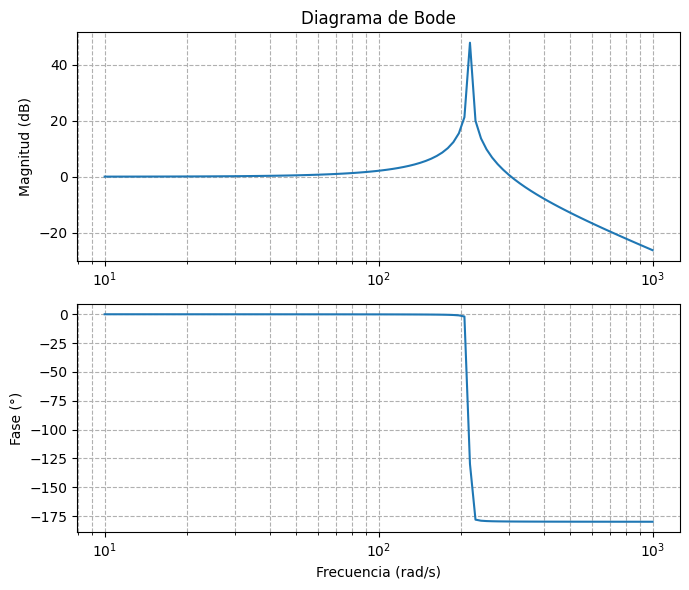

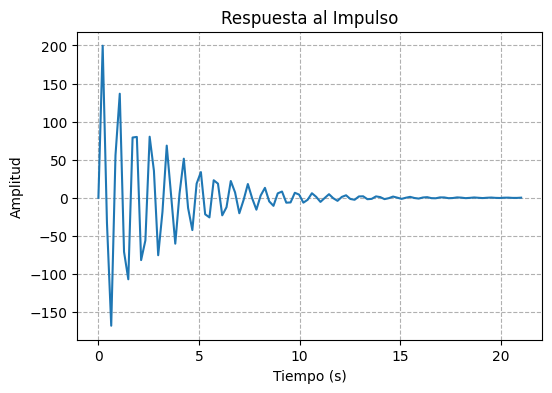

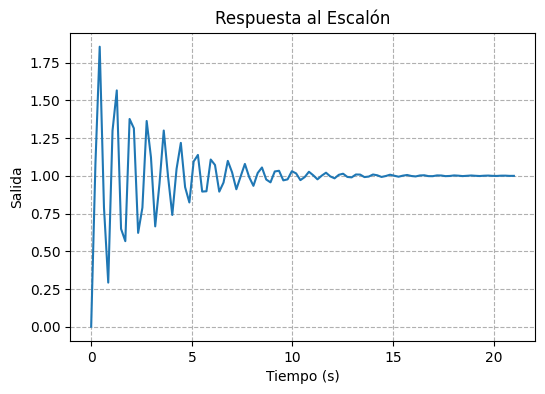

In [10]:
import sympy as sym
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# =======================
# 1. DEFINIR VARIABLES
# =======================
s = sym.symbols('s')

# Valores del sistema RLC
R = 120e-3
L = 180e-3
C = 120e-6

RLC = {sym.Symbol('R'): R,
       sym.Symbol('L'): L,
       sym.Symbol('C'): C}

# =======================
# 2. DEFINIR H(s)
# =======================
H = 1 / (L*C*s**2 + R*C*s + 1)

# obtener numerador y denominador
num, den = sym.fraction(H.subs(RLC))
num = sym.expand(num)
den = sym.expand(den)

# Transferencia en sympy
H_tf = TransferFunction(num, den, s)

print("H(s) =")
sym.pprint(H_tf)


# =======================
# 3. DIAGRAMA DE POLOS Y CEROS
# =======================
pole_zero_plot(H_tf)
plt.title("Diagrama de Polos y Ceros")
plt.show()


# =======================
# 4. DIAGRAMA DE BODE (usando scipy)
# =======================

# Convertir polinomios sympy a numpy
num_np = sym.Poly(num, s).all_coeffs()
den_np = sym.Poly(den, s).all_coeffs()

num_np = [float(c) for c in num_np]
den_np = [float(c) for c in den_np]

system = signal.TransferFunction(num_np, den_np)

w, mag, phase = signal.bode(system)

plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.semilogx(w, mag)
plt.grid(True, which="both", ls="--")
plt.ylabel("Magnitud (dB)")
plt.title("Diagrama de Bode")

plt.subplot(2,1,2)
plt.semilogx(w, phase)
plt.grid(True, which="both", ls="--")
plt.ylabel("Fase (°)")
plt.xlabel("Frecuencia (rad/s)")

plt.tight_layout()
plt.show()


# =======================
# 5. RESPUESTA AL IMPULSO
# =======================
t, y = signal.impulse(system)

plt.figure(figsize=(6,4))
plt.plot(t, y)
plt.grid(True, ls="--")
plt.title("Respuesta al Impulso")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()
# =======================
# 6. RESPUESTA AL ESCALÓN
# =======================
t_step, y_step = signal.step(system)

plt.figure(figsize=(6,4))
plt.plot(t_step, y_step)
plt.grid(True, ls="--")
plt.title("Respuesta al Escalón")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.show()